In [12]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 15, 5
import numpy as np

In [57]:
simpsons_ts = pd.read_csv('Simpsons_dataset/simpsons_sentiment_time_series.csv')
news_ts = pd.read_csv('news_dataset/news_time_series.csv', header=None)

In [58]:
simpsons_ts.head()

,original_air_date,sentiment
0,1989-12-17,0.053433
1,1990-01-14,0.039456
2,1990-01-21,0.078387
3,1990-01-28,0.070182
4,1990-02-04,0.069809


In [59]:
simpsons_ts = simpsons_ts.set_index('original_air_date')

In [60]:
simpsons_ts.index = pd.DatetimeIndex(simpsons_ts.index)

In [61]:
simpsons_ts = simpsons_ts.groupby(pd.Grouper(freq='M')).aggregate(np.average)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


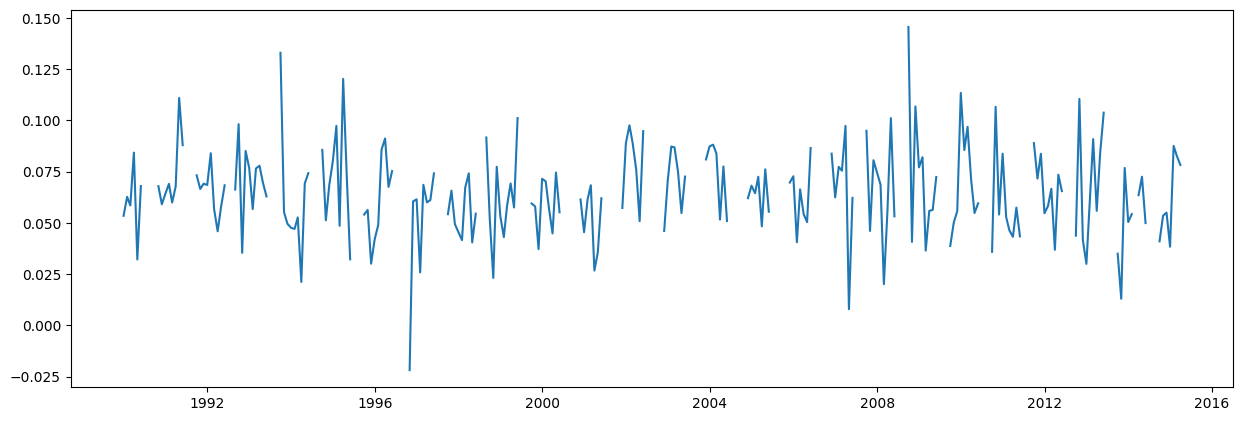

In [62]:
plt.plot(simpsons_ts)

In [63]:
missing_values = np.argwhere(np.isnan(simpsons_ts['sentiment']))
not_missing = np.argwhere(~np.isnan(simpsons_ts['sentiment']))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [64]:
train_x = not_missing
predict_x = missing_values
y = simpsons_ts['sentiment']
train_y  = y[train_x]

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(train_x)
pol_reg = LinearRegression()
pol_reg.fit(train_x, train_y)

predicted_y = pol_reg.predict(predict_x)

In [66]:
y[missing_values] =  predicted_y

In [69]:
news_ts.columns

Int64Index([0, 1], dtype='int64')

In [70]:
news_ts = news_ts.set_index(pd.to_datetime(news_ts[0]))

In [77]:
news_ts = news_ts.sort_index()

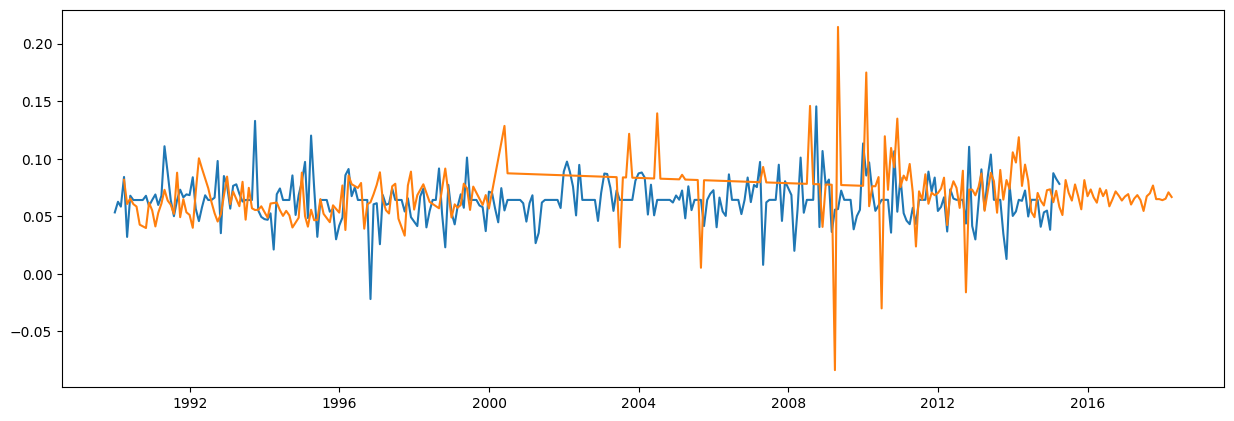

In [80]:
plt.plot(y)
plt.plot(news_ts.index, news_ts[1])

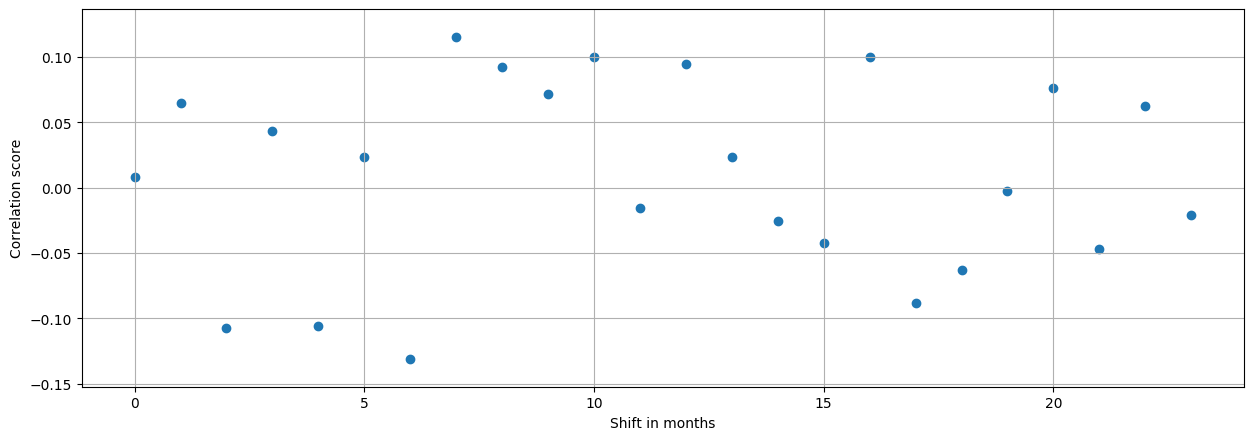

In [109]:
shift = []
corr = []
for i in range(0, 24):
    merged = pd.merge_asof(y.shift(i), news_ts[1], left_index=True, right_index=True, direction='nearest')
    score = merged.corr()['sentiment'][1]
    shift.append(i)
    corr.append(score)
plt.scatter(shift, corr)
plt.xlabel('Shift in months')
plt.ylabel('Correlation score')
plt.grid(True)
plt.show()